<a href="https://colab.research.google.com/github/AraksiaGevorgyan/Machine-Learning/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

In [3]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.5 MB/s eta 0:00:00


In [44]:
import pandas as pd
import prophet

In [45]:
df = pd.read_csv("dataset.csv")

In [46]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [47]:
print(df['Product'].unique())
print(df['Store'].unique())


[2667437]
['QLD_CW_ST0203']


In [48]:
df['Time Date'] = df['Time Date'].astype(str).str.zfill(8)
df['Time Date'] = pd.to_datetime(df['Time Date'], format='%d%m%Y')

In [49]:
df.head()

,Time Date,Product,Store,Value
0,2018-01-01,2667437,QLD_CW_ST0203,2926.000
1,2018-01-02,2667437,QLD_CW_ST0203,2687.531
2,2018-01-03,2667437,QLD_CW_ST0203,2793.000
3,2018-01-04,2667437,QLD_CW_ST0203,2394.000
4,2018-01-05,2667437,QLD_CW_ST0203,2660.000


In [50]:
df.drop(['Product', 'Store'], axis = 1, inplace = True)

In [51]:
df.columns = ["ds", 'y']

In [52]:
df.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [53]:
import matplotlib.pyplot as plt

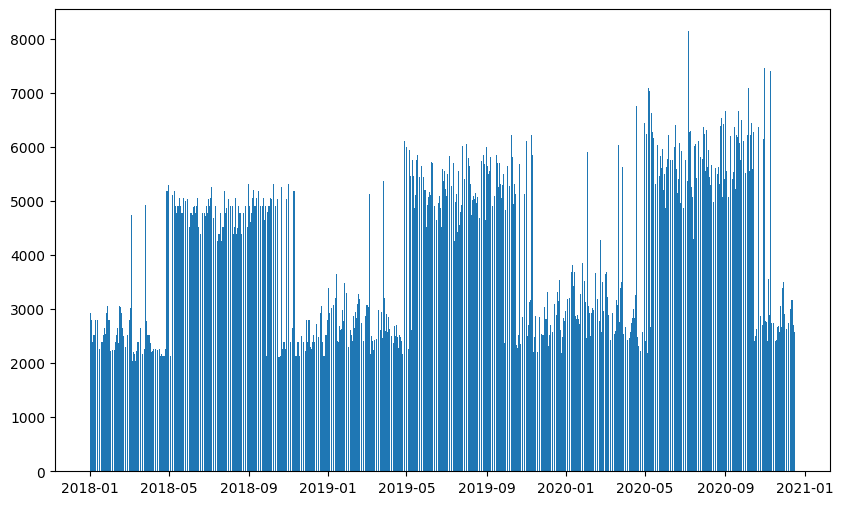

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(df['ds'], df['y'])
plt.show()

#Model Training

In [55]:
from prophet import Prophet

In [ ]:
m = Prophet(daily_seasonality=True)
model = m.fit(df)

#Forecast away

In [57]:
future = m.make_future_dataframe(periods = 50, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,1359.442962,3414.087228,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,1408.697768,3445.175991,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,1339.503416,3483.309968,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,1462.749854,3484.452309,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,1435.522278,3436.952797,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


In [58]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1125,2021-01-31,4183.401129,2883.976329,4969.326094,4182.872742,4183.809057,-310.244840,-310.244840,-310.244840,468.866564,...,25.208078,25.208078,25.208078,-804.319482,-804.319482,-804.319482,0.0,0.0,0.0,3873.156290
1126,2021-02-01,4184.473129,2835.433830,4910.210677,4183.928200,4184.900773,-321.209984,-321.209984,-321.209984,468.866564,...,16.599243,16.599243,16.599243,-806.675791,-806.675791,-806.675791,0.0,0.0,0.0,3863.263145
1127,2021-02-02,4185.545128,2840.512027,4879.991935,4184.985862,4185.991960,-350.446648,-350.446648,-350.446648,468.866564,...,-11.296388,-11.296388,-11.296388,-808.016824,-808.016824,-808.016824,0.0,0.0,0.0,3835.098480
1128,2021-02-03,4186.617127,2734.494903,4987.505676,4186.032843,4187.079613,-343.762849,-343.762849,-343.762849,468.866564,...,-4.417865,-4.417865,-4.417865,-808.211548,-808.211548,-808.211548,0.0,0.0,0.0,3842.854278
1129,2021-02-04,4187.689127,2911.488531,4929.556772,4187.082443,4188.168854,-315.842805,-315.842805,-315.842805,468.866564,...,22.477984,22.477984,22.477984,-807.187353,-807.187353,-807.187353,0.0,0.0,0.0,3871.846321


#Filter the forecast dataframe

In [59]:
last_date = df['ds'].max()
future_forecast = forecast[forecast['ds']>last_date]

In [60]:
future_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1080,2020-12-17,4135.161158,2196.498026,4316.255415,4135.161158,4135.161158,-837.717503,-837.717503,-837.717503,468.866564,...,22.477984,22.477984,22.477984,-1329.062051,-1329.062051,-1329.062051,0.0,0.0,0.0,3297.443655
1081,2020-12-18,4136.233158,2196.865636,4275.389183,4136.233158,4136.233158,-877.283406,-877.283406,-877.283406,468.866564,...,-34.571885,-34.571885,-34.571885,-1311.578085,-1311.578085,-1311.578085,0.0,0.0,0.0,3258.949752
1082,2020-12-19,4137.305157,2265.146445,4337.236757,4137.305157,4137.305157,-840.576399,-840.576399,-840.576399,468.866564,...,-13.999168,-13.999168,-13.999168,-1295.443795,-1295.443795,-1295.443795,0.0,0.0,0.0,3296.728758
1083,2020-12-20,4138.377156,2332.507516,4344.168795,4138.377156,4138.377156,-786.487797,-786.487797,-786.487797,468.866564,...,25.208078,25.208078,25.208078,-1280.562440,-1280.562440,-1280.562440,0.0,0.0,0.0,3351.889359
1084,2020-12-21,4139.449156,2294.209619,4384.140866,4139.449156,4139.449156,-781.318599,-781.318599,-781.318599,468.866564,...,16.599243,16.599243,16.599243,-1266.784406,-1266.784406,-1266.784406,0.0,0.0,0.0,3358.130557


#Visualisation

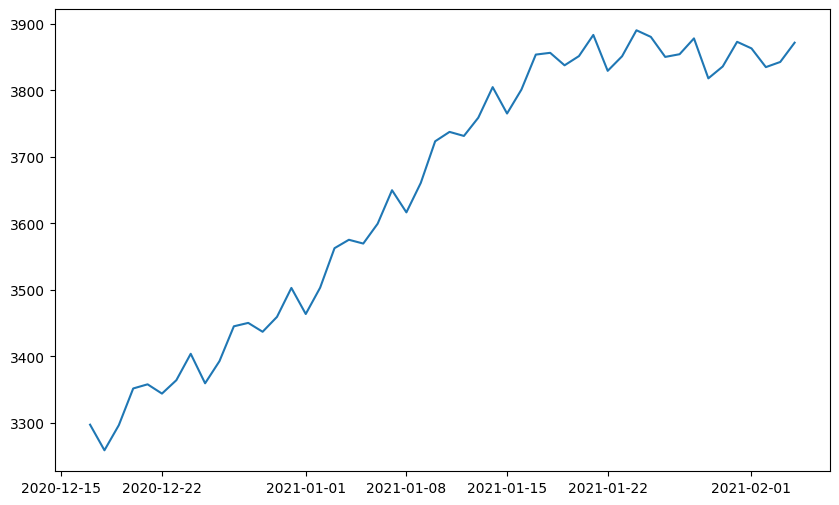

In [61]:
plt.figure(figsize=(10, 6))
plot1 = plt.plot(future_forecast['ds'], future_forecast['yhat'])
plt.xlabel = 'Date'
plt.ylabel = 'Value'
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

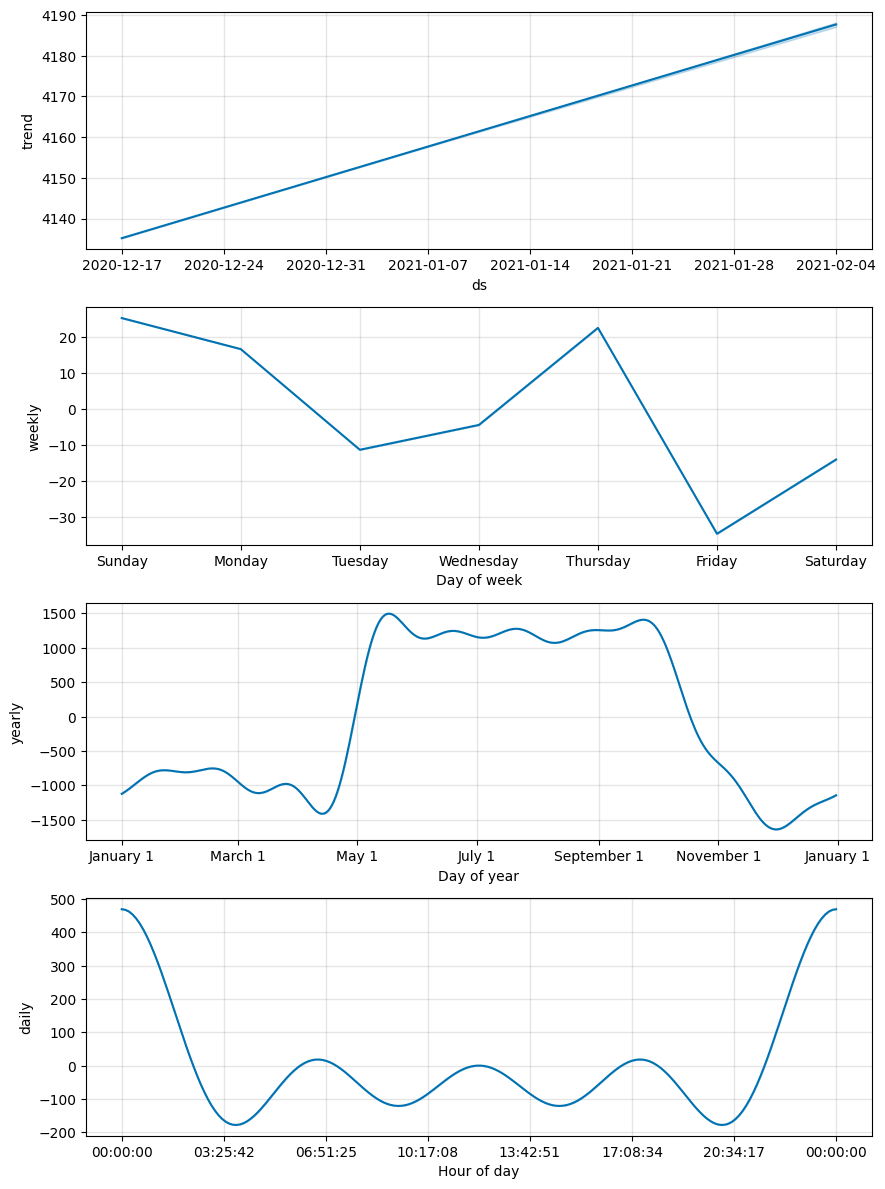

In [62]:
plt2 = m.plot_components(future_forecast)